# Walmart Recruiting - Store Sales Forecasting
Use historical markdown data to predict store sales


![](https://cw39.com/wp-content/uploads/sites/10/2021/06/AP20323809226583.jpg?w=1752&h=986&crop=1)

# Importing Libraries

In [1]:
!pip install jovian --upgrade --quiet
import jovian

In [2]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library.

In [3]:
od.download('https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kunwarakash
Your Kaggle Key: ········


  0%|          | 0.00/2.70M [00:00<?, ?B/s]

100%|██████████| 2.70M/2.70M [00:01<00:00, 2.18MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [4]:
os.listdir('walmart-recruiting-store-sales-forecasting')

['features.csv.zip',
 'sampleSubmission.csv.zip',
 'test.csv.zip',
 'train.csv.zip',
 'stores.csv']

In [5]:
from zipfile import ZipFile

with ZipFile('./walmart-recruiting-store-sales-forecasting/features.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')

with ZipFile('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/test.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')

with ZipFile('./walmart-recruiting-store-sales-forecasting/train.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')

os.listdir('walmart-recruiting-store-sales-forecasting')

['features.csv.zip',
 'sampleSubmission.csv',
 'test.csv',
 'sampleSubmission.csv.zip',
 'train.csv',
 'features.csv',
 'test.csv.zip',
 'train.csv.zip',
 'stores.csv']

Let's load the data into Pandas dataframes.

In [6]:
features = pd.read_csv("./walmart-recruiting-store-sales-forecasting/features.csv")
stores = pd.read_csv("./walmart-recruiting-store-sales-forecasting/stores.csv")
walmart = pd.read_csv("./walmart-recruiting-store-sales-forecasting/train.csv")
test = pd.read_csv("./walmart-recruiting-store-sales-forecasting/test.csv")
submission = pd.read_csv("./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv")

In [7]:
print("features.shape", features.shape)
print("stores.shape", stores.shape)
print("walmart.shape", walmart.shape)
print("test.shape", test.shape)
print("submission.shape", submission.shape)

features.shape (8190, 12)
stores.shape (45, 3)
walmart.shape (421570, 5)
test.shape (115064, 4)
submission.shape (115064, 2)


In [8]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
walmart.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
test.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [12]:
submission.head(5)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


Let's merge the information from `stores` into `walmart` and `test`.

In [13]:
merged_df = walmart.merge(stores, how='left').merge(features, how='left')
merged_test_df = test.merge(stores, how='left').merge(features, how='left')

In [14]:
print("merged_df.shape", merged_df.shape)
print("merged_test_df.shape", merged_test_df.shape)

merged_df.shape (421570, 16)
merged_test_df.shape (115064, 15)


In [15]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [16]:
merged_test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [17]:
import numpy as np
import seaborn as sns
import os
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline


### Date

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [18]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [19]:
split_date(merged_df)
split_date(merged_test_df)

## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [20]:
merged_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

### Impute missing numerical data

In [22]:
merged_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
WeekOfYear           0
dtype: int64

### Exploratory Data Analysis

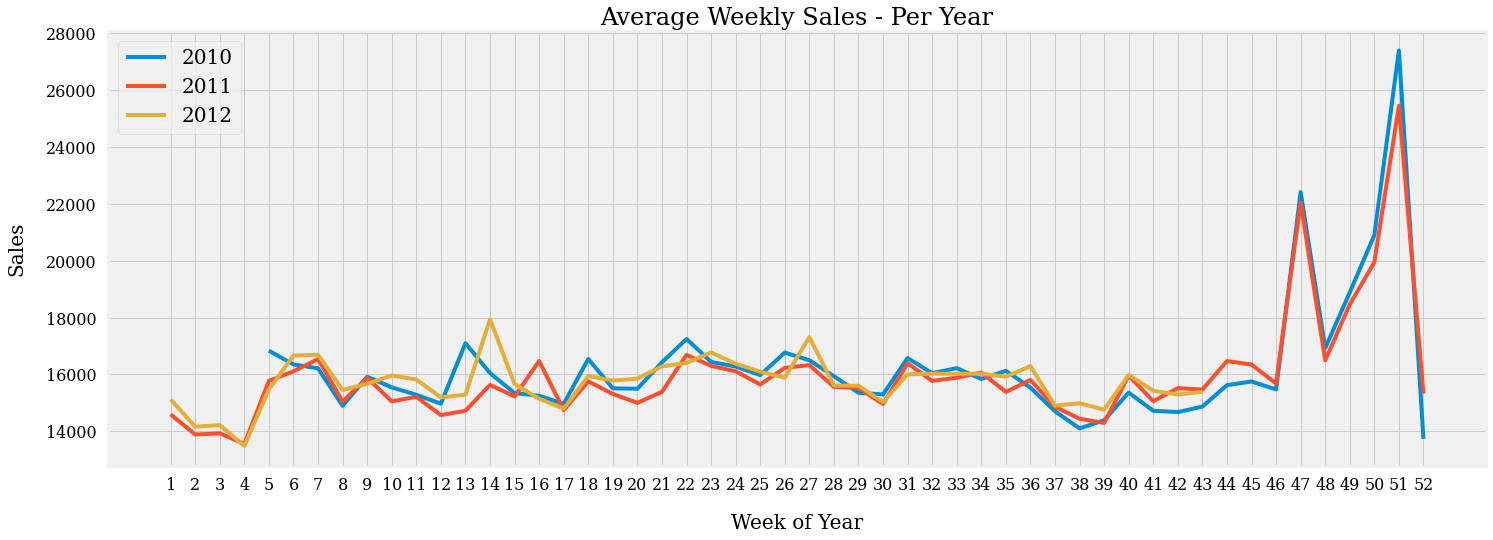

In [23]:
weekly_sales_2010 = merged_df[merged_df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged_df[merged_df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged_df[merged_df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

In [24]:
merged_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,2010,3,12,10
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,2010,3,19,11
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,2010,3,26,12
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,2010,4,2,13
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,2010,4,9,14


In [25]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')

Let's also identify Input and Target columns.

In [26]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
target_col = 'Weekly_Sales'

In [27]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [28]:
test_inputs = merged_test_df[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [29]:
numeric_cols = ['Store', 'Dept', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
categorical_cols = ['IsHoliday', 'Type']

In [30]:
#numeric_cols = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'WeekOfYear']
#categorical_cols = ['IsHoliday', 'Type']

In [31]:
inputs[numeric_cols].isna().sum()

Store                0
Dept                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
WeekOfYear           0
dtype: int64

In [32]:
test_inputs[numeric_cols].isna().sum()

Store               0
Dept                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Year                0
Month               0
Day                 0
WeekOfYear          0
dtype: int64

In [33]:
zero = 0
zero

0

In [34]:
inputs['MarkDown1'].fillna(zero, inplace=True)
inputs['MarkDown2'].fillna(zero, inplace=True)
inputs['MarkDown3'].fillna(zero, inplace=True)
inputs['MarkDown4'].fillna(zero, inplace=True)
inputs['MarkDown5'].fillna(zero, inplace=True)
test_inputs['MarkDown1'].fillna(zero, inplace=True)
test_inputs['MarkDown2'].fillna(zero, inplace=True)
test_inputs['MarkDown3'].fillna(zero, inplace=True)
test_inputs['MarkDown4'].fillna(zero, inplace=True)
test_inputs['MarkDown5'].fillna(zero, inplace=True)

In [35]:
mean_CPI = inputs.CPI.mean()
mean_Unemployment = inputs.Unemployment.mean()

In [36]:
inputs['CPI'].fillna(mean_CPI, inplace=True)
inputs['Unemployment'].fillna(mean_Unemployment, inplace=True)
test_inputs['CPI'].fillna(mean_CPI, inplace=True)
test_inputs['Unemployment'].fillna(mean_Unemployment, inplace=True)


In [37]:
test_inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

In [38]:
inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [41]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encode Categorical Columns


Let's one-hot encode categorical columns.

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoder1 = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(test_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols1 = list(encoder1.get_feature_names(categorical_cols))

In [44]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols1] = encoder1.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.

In [45]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols1]

### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [46]:
from xgboost import XGBRegressor

In [47]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's train the model using `model.fit`.

In [48]:
%%time
model.fit(X, targets)

CPU times: user 13.7 s, sys: 352 ms, total: 14.1 s
Wall time: 2.45 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [49]:
preds = model.predict(X)

### Prediction

Let's predict the submission set directly.

In [50]:
preds1 = model.predict(X_test)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [51]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [52]:
rmse(preds, targets)

10794.514467476938

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [53]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

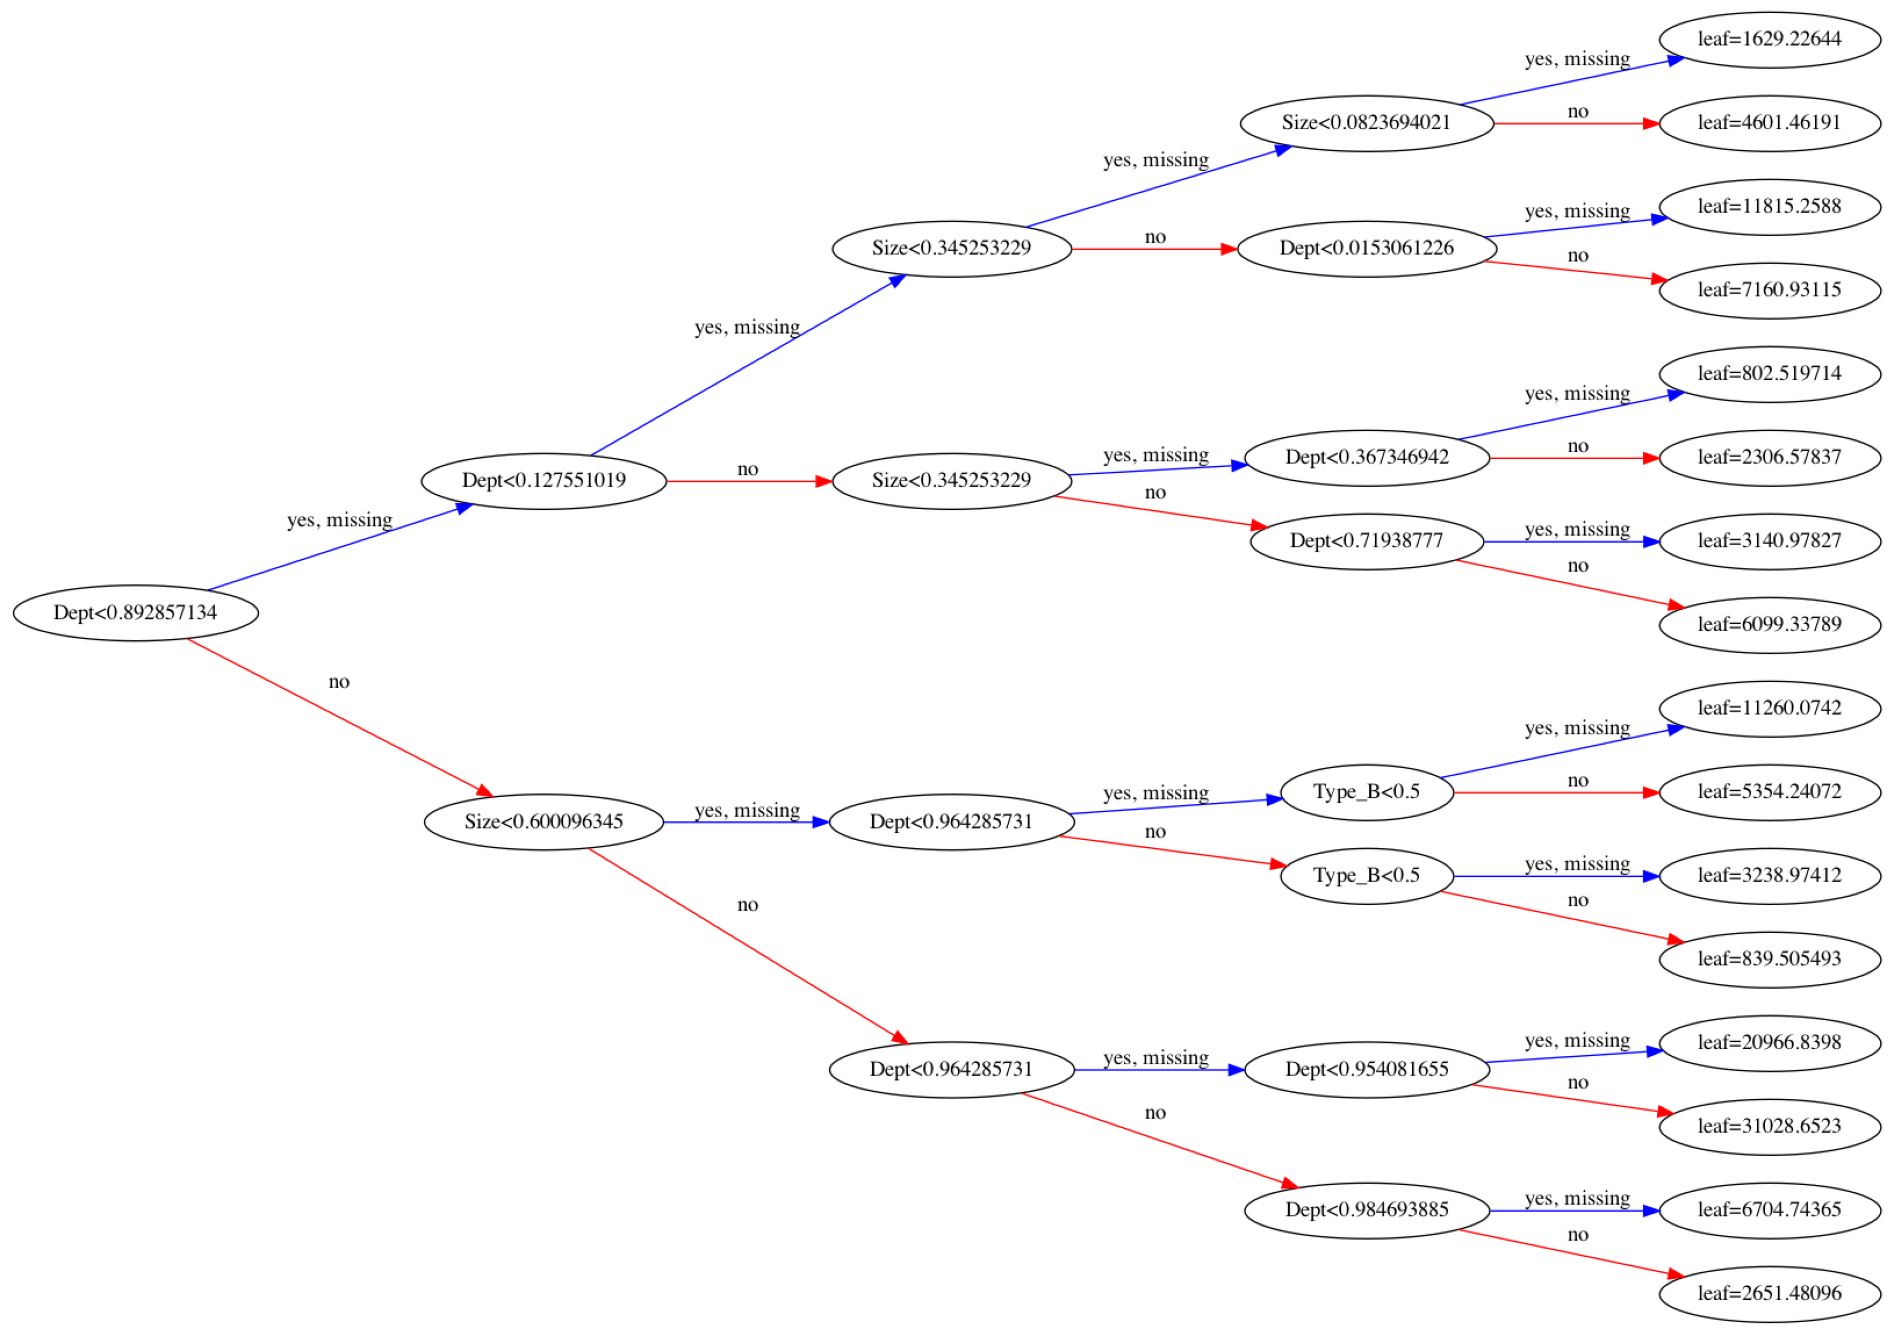

In [54]:
plot_tree(model, rankdir='LR');

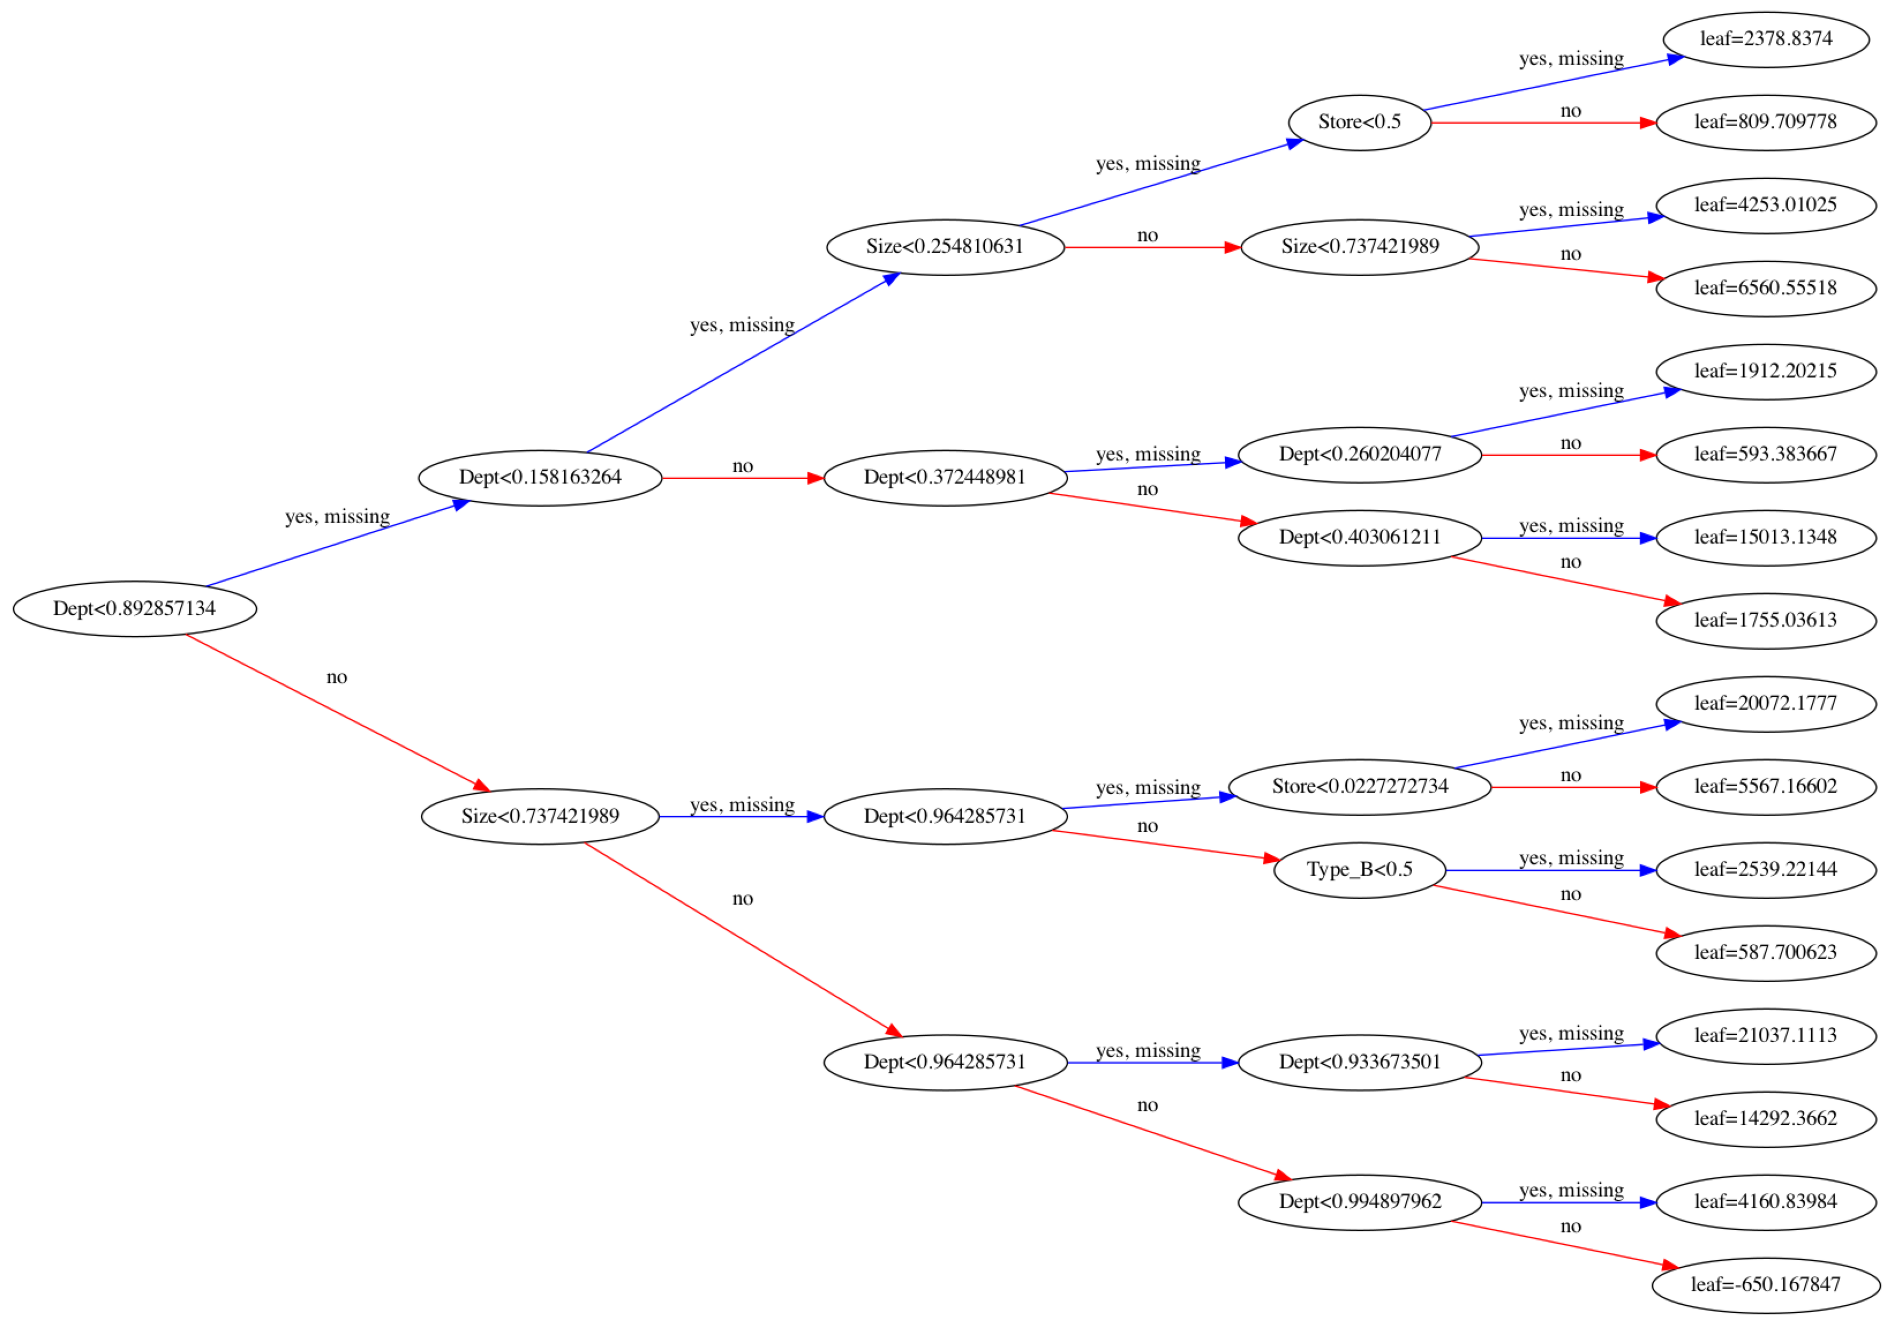

In [55]:
plot_tree(model, rankdir='LR', num_trees=1);

In [56]:
trees = model.get_booster().get_dump()

In [57]:
len(trees)

20

In [58]:
print(trees[0])

0:[Dept<0.892857134] yes=1,no=2,missing=1
	1:[Dept<0.127551019] yes=3,no=4,missing=3
		3:[Size<0.345253229] yes=7,no=8,missing=7
			7:[Size<0.0823694021] yes=15,no=16,missing=15
				15:leaf=1629.22644
				16:leaf=4601.46191
			8:[Dept<0.0153061226] yes=17,no=18,missing=17
				17:leaf=11815.2588
				18:leaf=7160.93115
		4:[Size<0.345253229] yes=9,no=10,missing=9
			9:[Dept<0.367346942] yes=19,no=20,missing=19
				19:leaf=802.519714
				20:leaf=2306.57837
			10:[Dept<0.71938777] yes=21,no=22,missing=21
				21:leaf=3140.97827
				22:leaf=6099.33789
	2:[Size<0.600096345] yes=5,no=6,missing=5
		5:[Dept<0.964285731] yes=11,no=12,missing=11
			11:[Type_B<0.5] yes=23,no=24,missing=23
				23:leaf=11260.0742
				24:leaf=5354.24072
			12:[Type_B<0.5] yes=25,no=26,missing=25
				25:leaf=3238.97412
				26:leaf=839.505493
		6:[Dept<0.964285731] yes=13,no=14,missing=13
			13:[Dept<0.954081655] yes=27,no=28,missing=27
				27:leaf=20966.8398
				28:leaf=31028.6523
			14:[Dept<0.984693885] yes=29,no=30,

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [59]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [60]:
importance_df.head(10)

,feature,importance
1,Dept,0.249013
2,Size,0.213528
7,MarkDown3,0.156463
19,Type_B,0.099339
0,Store,0.060020
10,CPI,0.057170
15,WeekOfYear,0.056116
20,Type_C,0.048159
11,Unemployment,0.031608
14,Day,0.019308


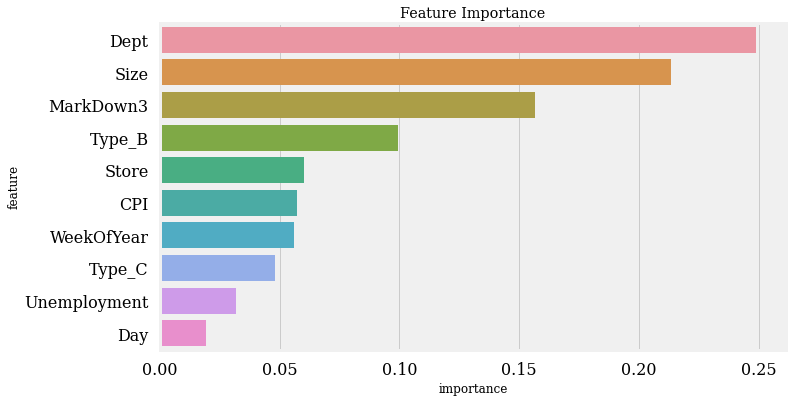

In [61]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation 

In [62]:
from sklearn.model_selection import KFold

Scikit-learn provides utilities for performing K fold cross validation.

Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, training error and validation error.

In [63]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

Now, we can use the `KFold` utility to create the different training/validations splits and train a separate model for each fold.

In [64]:
kfold = KFold(n_splits=5)

In [65]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 10879.13589468664, Validation RMSE: 13633.59119283054
Train RMSE: 10113.318710604226, Validation RMSE: 15830.5461042983
Train RMSE: 10842.287489766099, Validation RMSE: 14041.463519279303
Train RMSE: 11012.035712730096, Validation RMSE: 10165.836907797937
Train RMSE: 11277.98067293684, Validation RMSE: 10838.740051354298


Let's also define a function to average predictions from the 5 different models.

In [66]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [67]:
preds = predict_avg(models, X)

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.


In [68]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Here's a helper function to test hyperparameters with K-fold cross validation.

In [69]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [72]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.


In [73]:
test_params(n_estimators=10)

Train RMSE: 9972.352217593072, Validation RMSE: 9487.566018907239


In [74]:
test_params(n_estimators=100)

Train RMSE: 5299.728148785882, Validation RMSE: 5246.761760769854


In [75]:
test_params(n_estimators=500)

Train RMSE: 3145.6763134906355, Validation RMSE: 3672.3992559755175


#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [76]:
test_params(max_depth=2)

Train RMSE: 11654.384038652532, Validation RMSE: 11116.324235235947


In [77]:
test_params(max_depth=15)

Train RMSE: 548.6396373860301, Validation RMSE: 2567.3992002374366


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [78]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 19566.275845929013, Validation RMSE: 19129.67236094153


In [79]:
test_params(n_estimators=500, learning_rate=0.9)

Train RMSE: 2733.4342106815407, Validation RMSE: 3811.8494712768625


In [80]:
test_params(n_estimators=500, learning_rate=0.9, max_depth=15)

Train RMSE: 0.2468929383957248, Validation RMSE: 3442.745724333411


#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [81]:
test_params(booster='gblinear')

Train RMSE: 21695.74551063787, Validation RMSE: 21312.667139981473


## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters. 

In [82]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [83]:
model1 = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.9, max_depth=15, subsample=0.9, 
                     colsample_bytree=0.7)

In [84]:
%%time
model.fit(X, targets)

CPU times: user 27min 6s, sys: 39.1 s, total: 27min 45s
Wall time: 4min 47s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
%%time
model1.fit(X, targets)

CPU times: user 44min 50s, sys: 1min 46s, total: 46min 37s
Wall time: 9min 25s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

Now that the model is trained, we can make predictions on the test set.

model is by using (n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)) these parameters

In [86]:
test_preds_sub = model.predict(X_test)

In [87]:
test_preds = model.predict(X)

model1 is by using (n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.9, max_depth=15, subsample=0.9, 
                     colsample_bytree=0.7) these tested parameters

In [88]:
test_preds1 = model1.predict(X)

In [89]:
test_preds_sub1 = model1.predict(X_test)

In [90]:
rmse(test_preds, targets)

941.4120808915179

In [91]:
rmse(test_preds1, test_preds)

941.4112

In [96]:
rmse(preds, targets)

10925.813737812043

We tested final regult with XGBRegressor without any useful parameters and with parameters

Creating Submitting file

In [97]:
submission

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [98]:
test_preds1.shape

(421570,)

In [99]:
submission['Weekly_Sales'] = test_preds_sub1
submission.to_csv('submission.csv',index=False)

In [ ]:
jovian.submit(assignment="zerotogbms-project")

<IPython.core.display.Javascript object>